# This code is a part of a published article doi:
### <span style="color: red;"> Please review the article for further understanding before executing the code below.</span>

**Disclaimer:** 
Please note that this software is provided "as is" without any express or implied warranty. In no event shall the author or contributors b  held liable for any damages arising from the use of this software. This code was developed by an individual with a self-described amateur leve  of programming proficiency. As such, it may contain inefficiencies, bugs, or unintended behaviors. Users are advised to review and test th  code thoroughly before relying on it for any critical applications. Execution and use of this code are at the user's own risk. The autho  disclaims all responsibility for any potential adverse effects resulting from its use.



### Variable Parameters

In [1]:
# Input Parameters
Direction = "Y"  # Set direction for analysis (X or Y)
SetLag = 4  # Set desired lag distance (up to 3 for X direction and 4 for Y direction)
SimulationTime = 10  # Simulation time in minutes (up to 10 minutes)

### Sample Data

In [2]:
# Neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import NullLocator


# Sample total rainfall per 1 minute for 10 minute rainfall (mm)
Rainfall = {
    "DATETIME": [
        "2023-03-15 12:23:00",
        "2023-03-15 12:24:00",
        "2023-03-15 12:25:00",
        "2023-03-15 12:26:00",
        "2023-03-15 12:27:00",
        "2023-03-15 12:28:00",
        "2023-03-15 12:29:00",
        "2023-03-15 12:30:00",
        "2023-03-15 12:31:00",
        "2023-03-15 12:32:00",
    ],
    "R1": [1.4, 1.2, 1.2, 1.6, 1.2, 1.4, 1.0, 1.4, 1.4, 1.0],
    "R2": [1.8, 1.6, 1.8, 2.2, 2.2, 2.2, 2.2, 2.4, 1.8, 1.6],
    "R3": [1.6, 1.8, 1.8, 2.2, 2.0, 2.2, 2.2, 2.2, 1.8, 1.6],
    "R4": [1.4, 1.6, 1.6, 2.2, 1.8, 2.6, 2.4, 2.4, 1.8, 1.4],
    "R5": [1.2, 1.4, 1.2, 1.4, 1.4, 2.0, 1.8, 1.4, 1.2, 1.4],
    "R6": [1.4, 1.2, 1.2, 1.2, 1.2, 1.0, 1.2, 1.2, 1.2, 1.4],
    "R7": [1.2, 1.2, 1.0, 1.0, 1.2, 1.4, 1.0, 1.2, 1.2, 1.2],
    "R8": [1.6, 1.6, 1.2, 1.2, 1.2, 1.6, 1.2, 1.4, 1.4, 1.8],
    "R9": [0.8, 1.0, 0.8, 0.8, 1.0, 1.2, 0.8, 1.0, 0.8, 1.0],
    "R10": [0.8, 0.8, 0.8, 1.0, 0.8, 1.0, 0.8, 0.8, 1.0, 0.8],
    "R11": [2.4, 2.0, 1.8, 2.2, 2.0, 1.6, 1.6, 2.2, 2.0, 2.2],
    "R12": [2.6, 2.8, 2.4, 2.2, 2.6, 1.6, 1.8, 2.2, 2.2, 2.8],
    "R13": [2.8, 2.6, 2.6, 2.4, 2.4, 2.0, 2.0, 2.4, 2.4, 2.6],
    "R14": [2.2, 2.8, 2.0, 1.8, 2.0, 1.4, 1.8, 1.8, 2.0, 2.4],
    "R15": [1.0, 1.4, 1.0, 1.0, 1.2, 0.8, 1.0, 1.0, 1.2, 1.2],
    "R16": [2.4, 1.8, 2.2, 2.8, 2.4, 2.6, 2.2, 2.6, 2.4, 2.0],
    "R17": [2.8, 2.8, 2.6, 2.4, 2.8, 2.2, 2.6, 2.6, 2.4, 2.6],
    "R18": [2.4, 2.2, 2.4, 2.2, 2.4, 2.2, 2.4, 2.2, 2.2, 2.4],
    "R19": [2.6, 2.8, 2.6, 2.6, 2.8, 2.2, 2.8, 2.6, 2.4, 2.6],
    "R20": [1.4, 2.2, 1.6, 1.4, 1.6, 1.2, 1.6, 1.6, 1.4, 1.6],
}

# Spatial distribution of tipping rain gauges over rainfall area
SpatialDistribution = {
    "Gauge": ["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14",
              "R15", "R16", "R17", "R18", "R19", "R20"],
    "X": [60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 140, 140, 140, 140, 140, 180, 180, 180, 180, 180],
    "Y": [20, 60, 100, 140, 180, 20, 60, 100, 140, 180, 20, 60, 100, 140, 180, 20, 60, 100, 140, 180]
}

# Converting dictionaries to pandas Dataframe
dfSpatialDistribution = pd.DataFrame(SpatialDistribution)
dfRainfall = pd.DataFrame(Rainfall)

### Spatil Distribution of Rain Gauges

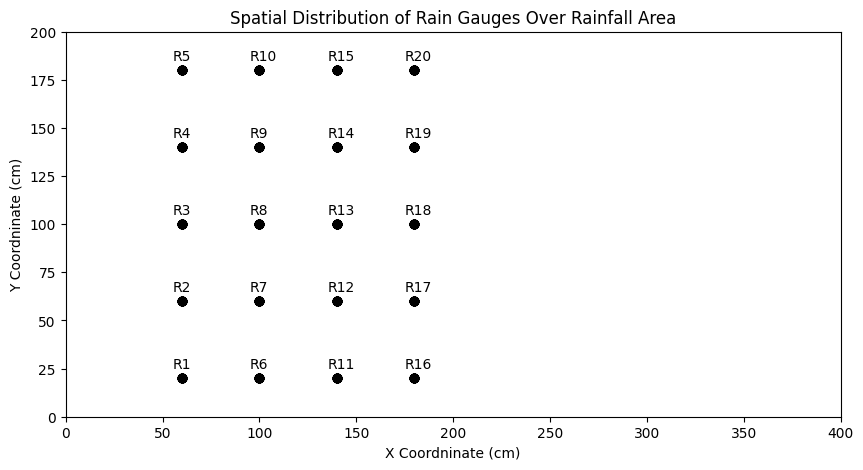

In [7]:
# Recognizing the spatial distribution of rain gauges
fig, ax = plt.subplots(figsize=(10,5))
for RainGauge in SpatialDistribution["Gauge"]:
    x = SpatialDistribution["X"]
    y = SpatialDistribution["Y"]
    ax.scatter(x, y, c="black", label=RainGauge)

n=0
for (i, j) in zip(x, y):
    plt.text(i-5, j+8, f"{SpatialDistribution['Gauge'][n]}",verticalalignment="center_baseline")
    n+=1

ax.set_xlim(0,400)
ax.set_ylim(0,200)
ax.set_xlabel("X Coordninate (cm)")
ax.set_ylabel("Y Coordninate (cm)")
ax.set_title("Spatial Distribution of Rain Gauges Over Rainfall Area")
plt.show()

### Main Functions

In [4]:
# Create Pairs in Set Direction
def CustomPairs(spatial_df, time_series_df, row_index, lag, direction):
    """Create pairs in a given direction with respect to spatial distribution and set lag distance."""
    pairs_data = []
    warnings = []

    # Function to add pairs based on direction and lag
    def add_pairs(gauges_in_line):
        """Check available pairs for a given lag and return DataFrame with vectors."""
        nonlocal pairs_data, warnings
        if len(gauges_in_line) <= lag:
            warnings.append(f"Lag {lag} is too large for the current line of gauges.")
            raise KeyError(f"Lag {lag} is too large for the current line of gauges.")
            return False  # Indicating that the function should break
        else:
            for i in range(len(gauges_in_line) - lag):
                head = time_series_df.iloc[row_index][gauges_in_line.iloc[i]]
                tail = time_series_df.iloc[row_index][gauges_in_line.iloc[i + lag]]
                pairs_data.append([head, tail])
            return True  # Indicating that pairs were successfully added

    if direction == "X":
        for y in sorted(spatial_df["Y"].unique()):
            gauges_in_line = spatial_df[spatial_df["Y"] == y].sort_values(by=["X"])["Gauge"]
            if not add_pairs(gauges_in_line):  # Check if it should break
                break
    elif direction == "Y":
        for x in sorted(spatial_df["X"].unique()):
            gauges_in_line = spatial_df[spatial_df["X"] == x].sort_values(by=["Y"])["Gauge"]
            if not add_pairs(gauges_in_line):  # Check if it should break
                break
    else:
        raise ValueError("Invalid direction. Choose either 'X' or 'Y'")

    # Check for warnings and act accordingly
    if warnings:
        for warning in warnings:
            print(warning)
        return pd.DataFrame()  # You might return an empty DataFrame or some indicator of failure

    # Return a DataFrame with a default value if no pairs were formed
    if not pairs_data:
        print("No pairs could be formed with the given parameters. Returning default DataFrame.")
        pairs_df = pd.DataFrame([[1, 1]], columns=["Tail", "Head"])  # Default DataFrame
    else:
        pairs_df = pd.DataFrame(pairs_data, columns=["Tail", "Head"])

    return pairs_df

# SemiVariogram is divided into two functions
def SumSqrDiff(df, col1:str, col2:str):
    """Calculate the sum of the squared differences between two columns."""
    SqrDiff = ((df[col1] - df[col2]) ** 2).sum()
    return SqrDiff

def SemiVariogram(df, col1:str, col2:str, interval):
    """Calculate values of semi-variance for a given DataFrame."""
    Sum = SumSqrDiff(df, col1, col2)
    N = len(df)
    Gama = (1/(2*N) * Sum)
    Lag = interval
    SV = pd.DataFrame({"Gama":[Gama],"Lag":[Lag]})
    return SV

### Main Loop

In [5]:
MaxLag = SetLag
dfs = dfSpatialDistribution
dfR = dfRainfall
Time = SimulationTime

SV = pd.DataFrame()  # Initialize an empty DataFrame for the final semivariogram data

# Main loop to generate semivariogram data for each TimeIndex
for TimeIndex in range(Time):
    # Initialize an empty DataFrame for accumulating semivariogram data for this TimeIndex
    SV_df_for_time_index = pd.DataFrame()

    # Iterate over each lag up to MaxLag
    for lag in range(1, MaxLag + 1):
        # Generate pairs and semivariogram data for the current lag
        Pairs = CustomPairs(dfs, dfR, TimeIndex, lag, Direction)
        current_sv_data = SemiVariogram(Pairs, "Tail", "Head", lag)

        if lag == 1:  # For the first lag, initialize the DataFrame directly
            SV_df_for_time_index = current_sv_data
        else:  # For subsequent lags, concatenate the new data
            SV_df_for_time_index = pd.concat([SV_df_for_time_index, current_sv_data], ignore_index=True)

    # Add a column for TimeIndex to distinguish rows after final concatenation
    SV_df_for_time_index["TimeIndex"] = TimeIndex

    # Concatenate the DataFrame for this TimeIndex with the final DataFrame
    SV = pd.concat([SV, SV_df_for_time_index], ignore_index=True)

SVT0 = SV[SV["TimeIndex"] == 0]
SVT1 = SV[SV["TimeIndex"] == 1]
SVT2 = SV[SV["TimeIndex"] == 2]
SVT3 = SV[SV["TimeIndex"] == 3]
SVT4 = SV[SV["TimeIndex"] == 4]
SVT5 = SV[SV["TimeIndex"] == 5]
SVT6 = SV[SV["TimeIndex"] == 6]
SVT7 = SV[SV["TimeIndex"] == 7]
SVT8 = SV[SV["TimeIndex"] == 8]
SVT9 = SV[SV["TimeIndex"] == 9]

### Plotting of the Calculated Variogram

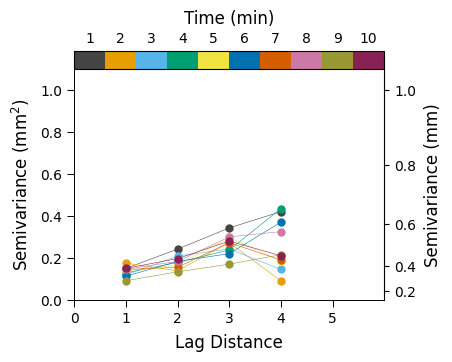

In [6]:
# Constants for font and line sizes
fSIZE = 12
tSIZE = 10
LINEo = 1
POINTo = 2
LINEw = 0.4
SIZE = 25


# Define colorblind-friendly colors
colorblind_friendly_colors = [
    "#444444",  # dark grey
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # bluish-green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # vermillion
    "#CC79A7",  # reddish-purple
    "#999933",  # olive green
    "#882255",  # wine
]
CustomColor = colorblind_friendly_colors

# SemiVariogram Plotting
fig, ax1 = plt.subplots(figsize=(4, 3))
ax1.set_ylabel("Semivariance (mm$^{2}$)", fontsize=fSIZE, labelpad=6)
ax1.set_xlabel("Lag Distance", fontsize=fSIZE, labelpad=6)
ax1.set_xlim(0, 6)
ax1.set_xticks(np.arange(0, 6, 1))
ax1.set_ylim(0, 1.1)
ax1.tick_params(axis="both", length=5, width=0.7, which="major", labelsize=tSIZE)
ax1.spines["top"].set_linewidth(0.7)
ax1.spines["bottom"].set_linewidth(0.7)
ax1.spines["left"].set_linewidth(0.7)
ax1.spines["right"].set_linewidth(0.7)

# Secondary y-axis for semivariance in mm
ax2 = ax1.secondary_yaxis("right", functions=(lambda x: np.sqrt(x), lambda x: x**2))
ax2.set_ylabel("Semivariance (mm)", fontsize=fSIZE, labelpad=6)
ax2.tick_params(axis="y", labelsize=tSIZE)
secondary_yticks = ax2.get_yticks()
secondary_yticks = secondary_yticks[secondary_yticks != 0.0]
ax2.set_yticks(secondary_yticks)
ax2.set_yticklabels(["{:.1f}".format(ytick) if ytick != 0.0 else "" for ytick in secondary_yticks])

# Plotting semi-variogram data for each time index
for i, SVT in enumerate([SVT0, SVT1, SVT2, SVT3, SVT4, SVT5, SVT6, SVT7, SVT8, SVT9]):
    ax1.scatter(SVT["Lag"], SVT["Gama"], c=CustomColor[i], s=SIZE, zorder=POINTo)
    ax1.plot(SVT["Lag"], SVT["Gama"], c=CustomColor[i], zorder=LINEo, lw=LINEw)

# Colorbar setup
CustomCmap = ListedColormap(CustomColor)
Boundaries = np.arange(0, 11, 1)
norm = BoundaryNorm(Boundaries, CustomCmap.N)
sm = ScalarMappable(norm=norm, cmap=CustomCmap)
pos = ax1.get_position()
colorbar_ax = fig.add_axes([pos.x0, pos.y0 + pos.height + 0.00, pos.width, 0.06])
cbar = fig.colorbar(sm, cax=colorbar_ax, orientation='horizontal', ticks=np.arange(0.5, 10.5))
cbar.set_ticklabels(np.arange(1, 11))
cbar.ax.tick_params(direction="in")
cbar.ax.xaxis.set_minor_locator(NullLocator())
cbar.ax.tick_params(size=0)
cbar.set_label("Time (min)", rotation=0, labelpad=6, fontsize=fSIZE)
cbar.ax.xaxis.set_label_position("top")
cbar.ax.xaxis.set_ticks_position("top")

plt.show()
